<a href="https://colab.research.google.com/github/goktuggokmen/analysis-of-covid-19-data/blob/main/Covid_19_Verilerinin_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='red'>EEM 314 Veri Madenciliğine Giriş</font>**
# **<font color='red'>Bonus : Covid-19 Verilerinin Analizi</font>**

# **<font color='gold'>1. Kütüphanelerin Yüklenmesi</font>**

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **<font color='gold'>2. Verilerin Dosyadan Okunması Ve Ön İnceleme</font>**

In [ ]:
data1 = pd.read_excel('/content/data1.xlsx')
data1

,Unnamed: 0,Açıklamalar,Tarih,Toplam_Vaka,Gunluk_Vaka,Toplam_Hasta,Gunluk_Hasta,Toplam_Vefat,Gunluk_Vefat,Toplam_iyilesen,Gunluk_iyilesen,Toplam_Test,Gunluk_Test,YBU,Entube,Ağır Hasta,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani
0,1.0,Veri Seti,2020-03-11,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,940.0,940.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,COVID-19 Pandemisi Türkiye Günlük Verileri,2020-03-12,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,2470.0,1530.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Kapsam,2020-03-13,5.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,4000.0,1530.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,"Bu veri seti, Sağlık Bakanlığı tarafından günl...",2020-03-14,6.0,NaN,5.0,3.0,NaN,NaN,NaN,NaN,5000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,Kaynak,2020-03-15,18.0,NaN,18.0,13.0,NaN,NaN,NaN,NaN,6000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,NaN,NaN,2021-06-22,5381736.0,6143.0,44369.0,565.0,49293.0,57.0,5242945.0,5214.0,58997073.0,223238.0,NaN,NaN,791.0,0.493,0.633,0.27
467,NaN,NaN,2021-06-23,5387545.0,5809.0,44370.0,550.0,49358.0,65.0,5248862.0,5917.0,59221265.0,224192.0,NaN,NaN,763.0,0.493,0.633,0.27
468,NaN,NaN,2021-06-24,5393248.0,5703.0,44371.0,498.0,49417.0,59.0,5254708.0,5846.0,59444650.0,223385.0,NaN,NaN,752.0,0.493,0.633,0.27
469,NaN,NaN,2021-06-25,5398878.0,5630.0,44372.0,477.0,49473.0,56.0,5261892.0,7184.0,59667586.0,222936.0,NaN,NaN,737.0,0.493,0.633,0.27


In [ ]:
data2 = pd.read_csv('/content/data2.csv')
data2

,Unnamed: 0,Açıklamalar,Tarih,E_<2,E_2-4,E_5-14,E_15-24,E_25-49,E_50-64,E_65-79,E_80+,K_<2,K_2-4,K_5-14,K_15-24,K_25-49,K_50-64,K_65-79,K_80+
0,1.0,Tablo3,29.06.2020,7,11,38,89,378.000,136,61,15,5,7,32,117,300,108,60,15
1,NaN,Cinsiyet ve Yaş Grubuna Göre Yeni COVID-19 Has...,30.06.2020,4,6,29,96,358.000,131,48,12,1,6,28,114,278,113,59,19
2,2.0,Veri Girişi,01.07.2020,6,14,30,92,315.000,106,49,10,4,8,32,92,260,114,54,12
3,NaN,Hatice Sena Manap,02.07.2020,6,7,35,89,318.000,108,49,10,5,8,24,90,262,110,53,13
4,3.0,Veri Kontrolü,03.07.2020,6,9,28,75,310.000,120,43,10,6,9,34,84,266,104,58,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,NaN,NaN,19.11.2020,7,7,64,320,1.142,444,195,41,6,7,59,363,1133,464,230,59
144,NaN,NaN,20.11.2020,9,10,72,358,1.270,501,229,42,7,8,70,399,1256,542,262,68
145,NaN,NaN,21.11.2020,10,12,75,360,1.358,542,249,55,7,9,73,447,1383,586,289,77
146,NaN,NaN,22.11.2020,10,11,81,375,1.456,592,278,58,8,10,78,474,1535,653,315,82


**<font color='black'>Her kolonda kaç adet veri var ve bu veriler hangi tipte ?</font>**

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         8 non-null      float64       
 1   Açıklamalar                        22 non-null     object        
 2   Tarih                              471 non-null    datetime64[ns]
 3   Toplam_Vaka                        470 non-null    float64       
 4   Gunluk_Vaka                        211 non-null    float64       
 5   Toplam_Hasta                       470 non-null    float64       
 6   Gunluk_Hasta                       470 non-null    float64       
 7   Toplam_Vefat                       464 non-null    float64       
 8   Gunluk_Vefat                       464 non-null    float64       
 9   Toplam_iyilesen                    455 non-null    float64       
 10  Gunluk_iyilesen                    455

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   12 non-null     float64
 1   Açıklamalar  31 non-null     object 
 2   Tarih        148 non-null    object 
 3   E_<2         148 non-null    int64  
 4   E_2-4        148 non-null    int64  
 5   E_5-14       148 non-null    int64  
 6   E_15-24      148 non-null    int64  
 7   E_25-49      148 non-null    float64
 8   E_50-64      148 non-null    int64  
 9   E_65-79      148 non-null    int64  
 10  E_80+        148 non-null    int64  
 11  K_<2         148 non-null    int64  
 12  K_2-4        148 non-null    int64  
 13  K_5-14       148 non-null    int64  
 14  K_15-24      148 non-null    int64  
 15  K_25-49      148 non-null    int64  
 16  K_50-64      148 non-null    int64  
 17  K_65-79      148 non-null    int64  
 18  K_80+        148 non-null    int64  
dtypes: float

In [ ]:
#sayısal veri içeren kolonların özelliklerinin özetlenmesi.
data1.describe() 

,Unnamed: 0,Toplam_Vaka,Gunluk_Vaka,Toplam_Hasta,Gunluk_Hasta,Toplam_Vefat,Gunluk_Vefat,Toplam_iyilesen,Gunluk_iyilesen,Toplam_Test,Gunluk_Test,YBU,Entube,Ağır Hasta,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani
count,8.00000,4.700000e+02,211.000000,470.000000,470.000000,464.000000,464.000000,4.550000e+02,455.000000,4.700000e+02,470.000000,124.000000,124.000000,330.000000,48.000000,48.000000,48.000000
mean,4.50000,1.594816e+06,19543.421801,358183.236170,1809.617021,17373.174569,105.732759,1.525735e+06,9096.828571,1.974254e+07,126011.940426,1120.459677,539.241935,2220.293939,0.485438,0.626417,0.293563
std,2.44949,1.801663e+06,15441.538069,256364.777125,1436.477539,14826.219455,88.095899,1.719867e+06,18160.900867,1.793914e+07,80213.111067,388.949333,264.386739,1414.445116,0.026714,0.021705,0.021683
min,1.00000,1.000000e+00,5012.000000,1.000000,0.000000,1.000000,1.000000,0.000000e+00,-173318.000000,9.400000e+02,940.000000,344.000000,241.000000,542.000000,0.437000,0.600000,0.270000
25%,2.75000,2.071072e+05,7712.500000,151858.000000,902.000000,5338.750000,36.750000,2.004235e+05,1227.000000,3.695309e+06,45390.250000,773.500000,360.500000,1220.750000,0.455000,0.602000,0.276000
50%,4.50000,3.764200e+05,13029.000000,292020.000000,1398.500000,10519.500000,75.000000,3.382390e+05,3246.000000,1.406349e+07,117159.500000,1126.500000,400.500000,1624.500000,0.493000,0.625000,0.279000
75%,6.25000,2.681670e+06,29191.500000,656837.250000,2309.500000,28519.500000,154.250000,2.582127e+06,9060.000000,3.290756e+07,184050.750000,1317.750000,769.000000,3080.750000,0.499000,0.633000,0.307000
max,8.00000,5.404144e+06,63082.000000,812354.000000,7381.000000,49524.000000,394.000000,5.269294e+06,188108.000000,5.989015e+07,322128.000000,1922.000000,1087.000000,5988.000000,0.531000,0.682000,0.338000


In [ ]:
data2.describe()

,Unnamed: 0,E_<2,E_2-4,E_5-14,E_15-24,E_25-49,E_50-64,E_65-79,E_80+,K_<2,K_2-4,K_5-14,K_15-24,K_25-49,K_50-64,K_65-79,K_80+
count,12.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,6.500000,4.405405,6.027027,31.533784,120.141892,387.554831,162.763514,73.466216,15.500000,3.648649,5.216216,30.506757,138.256757,419.925676,171.844595,84.412162,21.439189
std,3.605551,1.334206,1.564687,12.092284,65.147035,160.168040,93.865178,41.872079,8.605883,1.111871,1.237402,11.625972,75.617919,239.713267,100.362724,47.165352,12.291929
min,1.000000,2.000000,4.000000,16.000000,58.000000,1.085000,80.000000,30.000000,6.000000,1.000000,3.000000,17.000000,66.000000,200.000000,80.000000,39.000000,9.000000
25%,3.750000,4.000000,5.000000,23.750000,76.000000,284.750000,106.750000,51.750000,12.000000,3.000000,4.000000,23.000000,90.000000,279.500000,113.750000,60.000000,15.000000
50%,6.500000,4.000000,6.000000,27.000000,104.500000,377.000000,142.000000,64.000000,14.000000,3.000000,5.000000,27.000000,120.500000,369.000000,151.000000,75.000000,19.000000
75%,9.250000,5.000000,6.250000,37.250000,134.000000,446.000000,173.250000,78.250000,16.250000,4.000000,6.000000,34.250000,155.500000,450.250000,181.000000,88.250000,22.250000
max,12.000000,10.000000,14.000000,81.000000,432.000000,980.000000,672.000000,294.000000,59.000000,8.000000,11.000000,82.000000,492.000000,1668.000000,687.000000,321.000000,82.000000


# **<font color='gold'>3. Verinin Düzenlenmesi</font>**

**<font color='black'>Gereksiz kolonları siliyoruz.</font>**

In [ ]:
data1.drop(['Unnamed: 0','Açıklamalar'], axis = 1, inplace = True)
data1

,Tarih,Toplam_Vaka,Gunluk_Vaka,Toplam_Hasta,Gunluk_Hasta,Toplam_Vefat,Gunluk_Vefat,Toplam_iyilesen,Gunluk_iyilesen,Toplam_Test,Gunluk_Test,YBU,Entube,Ağır Hasta,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani
0,2020-03-11,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,940.0,940.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-12,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,2470.0,1530.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-13,5.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,4000.0,1530.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-14,6.0,NaN,5.0,3.0,NaN,NaN,NaN,NaN,5000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-15,18.0,NaN,18.0,13.0,NaN,NaN,NaN,NaN,6000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,2021-06-22,5381736.0,6143.0,44369.0,565.0,49293.0,57.0,5242945.0,5214.0,58997073.0,223238.0,NaN,NaN,791.0,0.493,0.633,0.27
467,2021-06-23,5387545.0,5809.0,44370.0,550.0,49358.0,65.0,5248862.0,5917.0,59221265.0,224192.0,NaN,NaN,763.0,0.493,0.633,0.27
468,2021-06-24,5393248.0,5703.0,44371.0,498.0,49417.0,59.0,5254708.0,5846.0,59444650.0,223385.0,NaN,NaN,752.0,0.493,0.633,0.27
469,2021-06-25,5398878.0,5630.0,44372.0,477.0,49473.0,56.0,5261892.0,7184.0,59667586.0,222936.0,NaN,NaN,737.0,0.493,0.633,0.27


In [ ]:
data2.drop(['Unnamed: 0','Açıklamalar'], axis = 1, inplace = True)
data2

,Tarih,E_<2,E_2-4,E_5-14,E_15-24,E_25-49,E_50-64,E_65-79,E_80+,K_<2,K_2-4,K_5-14,K_15-24,K_25-49,K_50-64,K_65-79,K_80+
0,29.06.2020,7,11,38,89,378.000,136,61,15,5,7,32,117,300,108,60,15
1,30.06.2020,4,6,29,96,358.000,131,48,12,1,6,28,114,278,113,59,19
2,01.07.2020,6,14,30,92,315.000,106,49,10,4,8,32,92,260,114,54,12
3,02.07.2020,6,7,35,89,318.000,108,49,10,5,8,24,90,262,110,53,13
4,03.07.2020,6,9,28,75,310.000,120,43,10,6,9,34,84,266,104,58,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,19.11.2020,7,7,64,320,1.142,444,195,41,6,7,59,363,1133,464,230,59
144,20.11.2020,9,10,72,358,1.270,501,229,42,7,8,70,399,1256,542,262,68
145,21.11.2020,10,12,75,360,1.358,542,249,55,7,9,73,447,1383,586,289,77
146,22.11.2020,10,11,81,375,1.456,592,278,58,8,10,78,474,1535,653,315,82


In [ ]:
data2['E_25-49'] = data2['E_25-49'].astype(np.int64) #data2'nin bu kolonu diğer kolonlardan farklı olarak float64 tipinde olduğundan öncelikle bu kolonu integer'a çeviriyoruz.

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tarih    148 non-null    object
 1   E_<2     148 non-null    int64 
 2   E_2-4    148 non-null    int64 
 3   E_5-14   148 non-null    int64 
 4   E_15-24  148 non-null    int64 
 5   E_25-49  148 non-null    int64 
 6   E_50-64  148 non-null    int64 
 7   E_65-79  148 non-null    int64 
 8   E_80+    148 non-null    int64 
 9   K_<2     148 non-null    int64 
 10  K_2-4    148 non-null    int64 
 11  K_5-14   148 non-null    int64 
 12  K_15-24  148 non-null    int64 
 13  K_25-49  148 non-null    int64 
 14  K_50-64  148 non-null    int64 
 15  K_65-79  148 non-null    int64 
 16  K_80+    148 non-null    int64 
dtypes: int64(16), object(1)
memory usage: 19.8+ KB


**<font color='black'>data2'yi daha sonraki uygulamalar için yaş aralıklarına göre üç parçaya böleceğiz (genç, orta ve yaşlı olarak).</font>**


In [ ]:
genc = data2['E_<2']+data2['E_2-4']+data2['E_5-14']+data2['E_15-24']+data2['K_<2']+data2['K_2-4']+data2['K_5-14']+data2['K_15-24'] #2 yaş altı, 2-4 yaş, 5-14 yaş ve 15-24 yaşı genç kategorisine dahil ettik.
genc = pd.DataFrame(genc)
genc['Tarih'] = data2['Tarih']
genc = genc[['Tarih',0]]
genc

,Tarih,0
0,29.06.2020,306
1,30.06.2020,284
2,01.07.2020,278
3,02.07.2020,264
4,03.07.2020,251
...,...,...
143,19.11.2020,833
144,20.11.2020,933
145,21.11.2020,993
146,22.11.2020,1047


In [ ]:
orta = data2['E_25-49']+data2['E_50-64']+data2['K_25-49']+data2['K_50-64'] #25-49 yaş arası ve 50-64 yaş arasını dahil ettik.
orta = pd.DataFrame(orta)
orta['Tarih'] = data2['Tarih']
orta = orta[['Tarih',0]]
orta

,Tarih,0
0,29.06.2020,922
1,30.06.2020,880
2,01.07.2020,795
3,02.07.2020,798
4,03.07.2020,800
...,...,...
143,19.11.2020,2042
144,20.11.2020,2300
145,21.11.2020,2512
146,22.11.2020,2781


In [ ]:
yasli = data2['E_65-79']+data2['E_80+']+data2['K_65-79']+data2['K_80+'] #65-79 yaş ve 80 yaş üstünü dahil ettik.
yasli = pd.DataFrame(yasli)
yasli['Tarih'] = data2['Tarih']
yasli = yasli[['Tarih',0]]
yasli

,Tarih,0
0,29.06.2020,151
1,30.06.2020,138
2,01.07.2020,125
3,02.07.2020,125
4,03.07.2020,126
...,...,...
143,19.11.2020,525
144,20.11.2020,601
145,21.11.2020,670
146,22.11.2020,733


**<font color='black'>Bunun ardından data2'yi kadınlar ve erkekler olarak iki parçaya böleceğiz.</font>**

In [ ]:
erkek = data2['E_<2']+data2['E_2-4']+data2['E_5-14']+data2['E_15-24']+data2['E_25-49']+data2['E_50-64']+data2['E_65-79']+data2['E_80+'] 
erkek = pd.DataFrame(erkek)
erkek['Tarih'] = data2['Tarih']
erkek = erkek[['Tarih',0]]
erkek

,Tarih,0
0,29.06.2020,735
1,30.06.2020,684
2,01.07.2020,622
3,02.07.2020,622
4,03.07.2020,601
...,...,...
143,19.11.2020,1079
144,20.11.2020,1222
145,21.11.2020,1304
146,22.11.2020,1406


In [ ]:
kadın = data2['K_<2']+data2['K_2-4']+data2['K_5-14']+data2['K_15-24']+data2['K_25-49']+data2['K_50-64']+data2['K_65-79']+data2['K_80+'] 
kadın = pd.DataFrame(kadın)
kadın['Tarih'] = data2['Tarih']
kadın = kadın[['Tarih',0]]
kadın

,Tarih,0
0,29.06.2020,644
1,30.06.2020,618
2,01.07.2020,576
3,02.07.2020,565
4,03.07.2020,576
...,...,...
143,19.11.2020,2321
144,20.11.2020,2612
145,21.11.2020,2871
146,22.11.2020,3155


# **<font color='gold'>4. Verinin İncelenmesi</font>**

# **<font color='black'>1.Kısım</font>**

**<font color='black'>Vaka sayılarının günlük veya toplam değişimini gözlemlemek için endeksimizi tarih olarak atayacağız.</font>**

In [ ]:
tarih_index = data1.set_index('Tarih')

**<font color='black'>data1'deki verilerin tarih endeksli değişimleri.</font>**

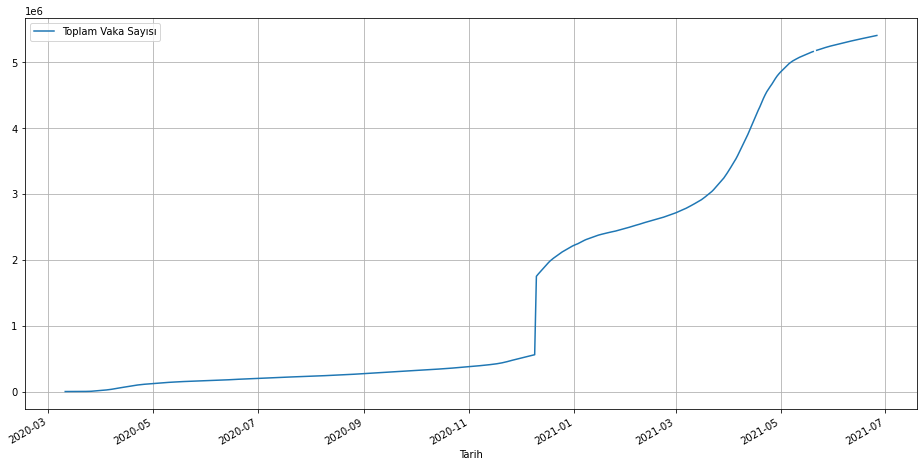

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['Toplam_Vaka'].plot()
plt.grid()
plt.legend(['Toplam Vaka Sayısı'])

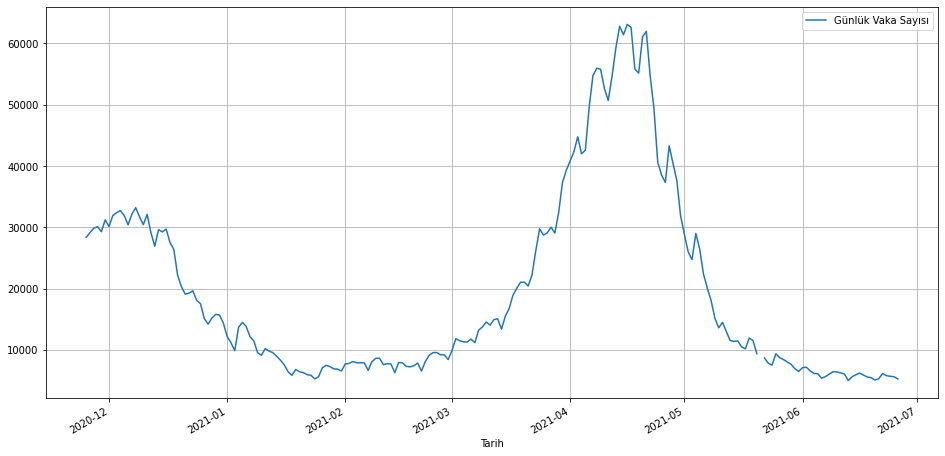

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['Gunluk_Vaka'].plot()
plt.grid()
plt.legend(['Günlük Vaka Sayısı'])

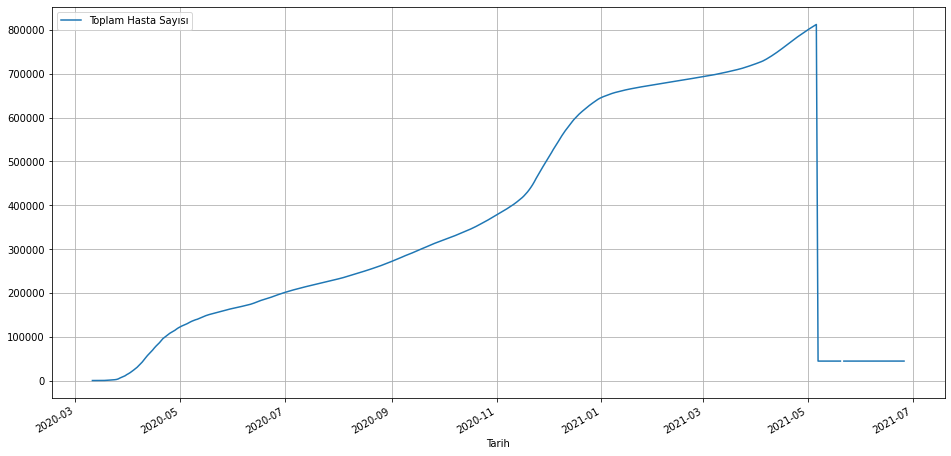

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['Toplam_Hasta'].plot()
plt.grid()
plt.legend(['Toplam Hasta Sayısı'])

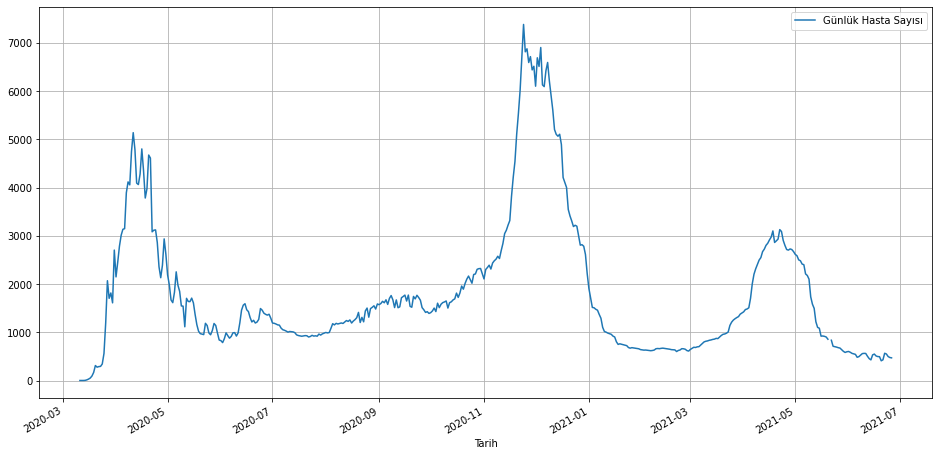

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['Gunluk_Hasta'].plot()
plt.grid()
plt.legend(['Günlük Hasta Sayısı'])

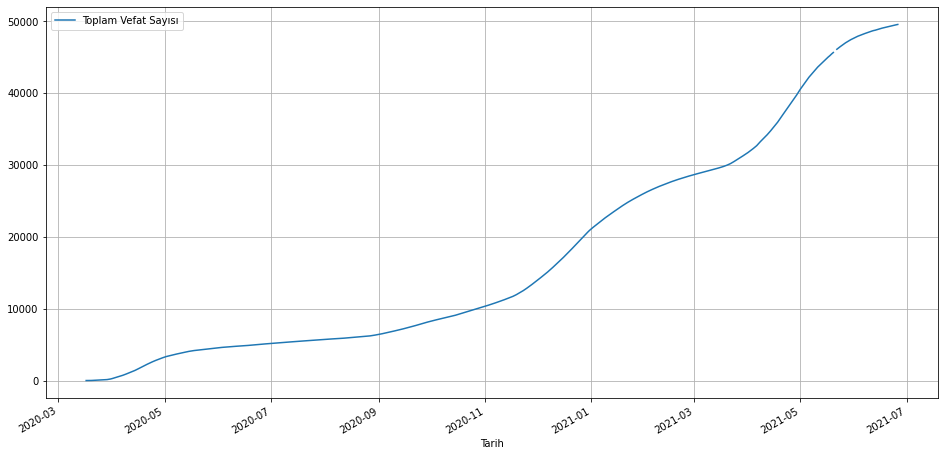

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['Toplam_Vefat'].plot()
plt.grid()
plt.legend(['Toplam Vefat Sayısı'])

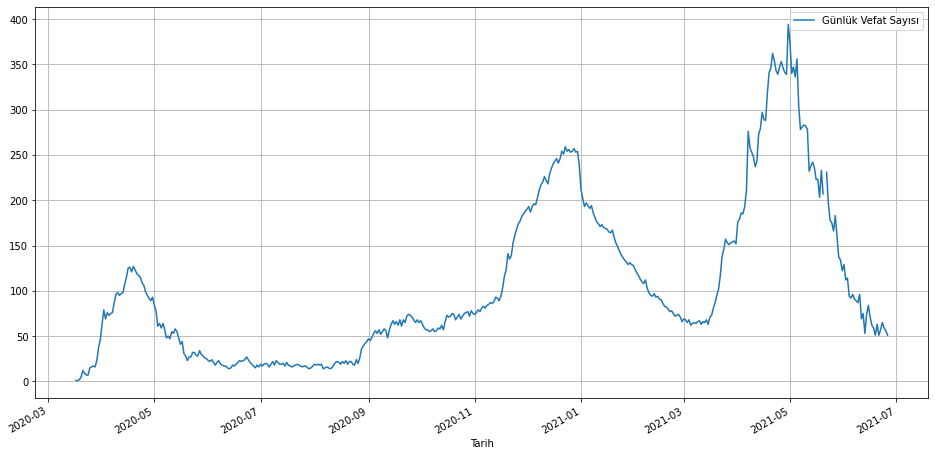

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['Gunluk_Vefat'].plot()
plt.grid()
plt.legend(['Günlük Vefat Sayısı'])

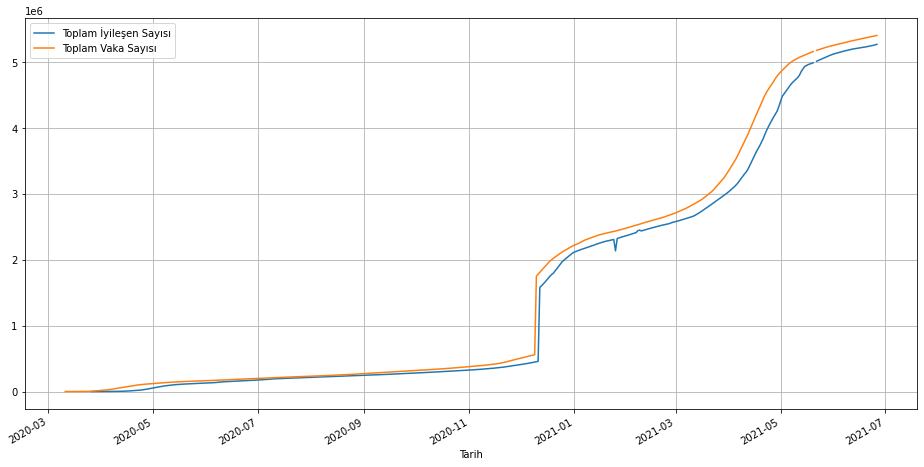

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['Toplam_iyilesen'].plot()
tarih_index['Toplam_Vaka'].plot()
plt.grid()
plt.legend(['Toplam İyileşen Sayısı','Toplam Vaka Sayısı'])

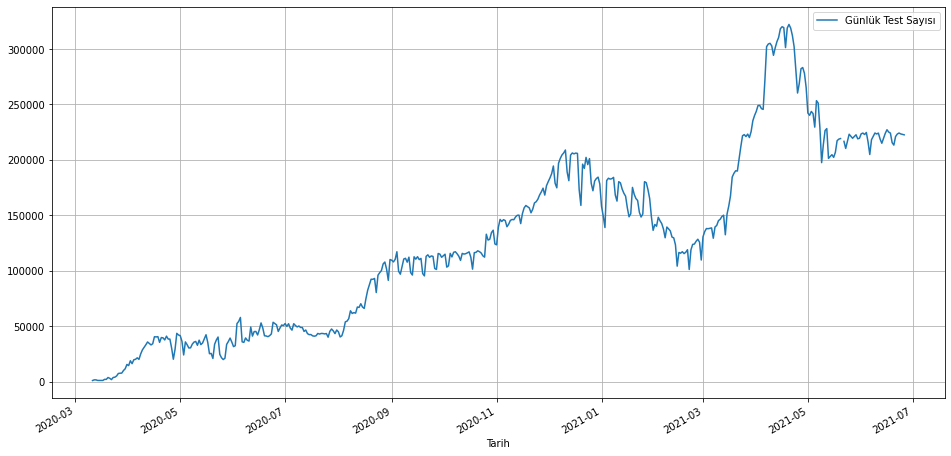

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['Gunluk_Test'].plot()
plt.grid()
plt.legend(['Günlük Test Sayısı'])

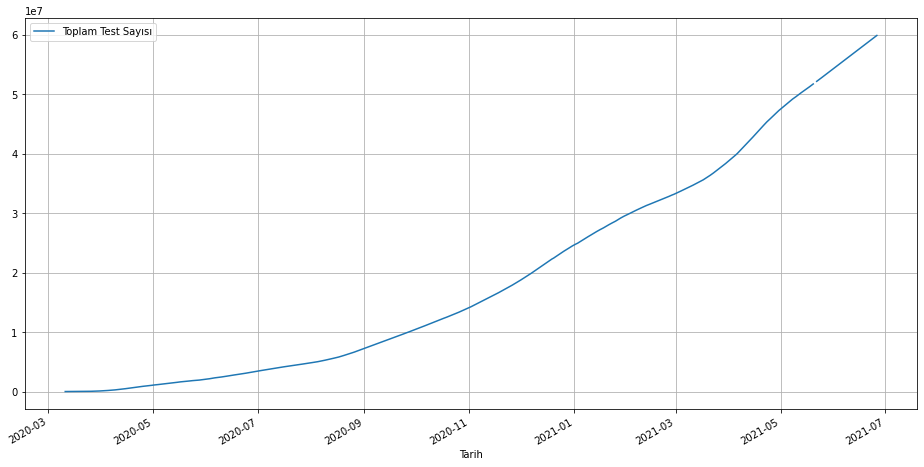

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['Toplam_Test'].plot()
plt.grid()
plt.legend(['Toplam Test Sayısı'])

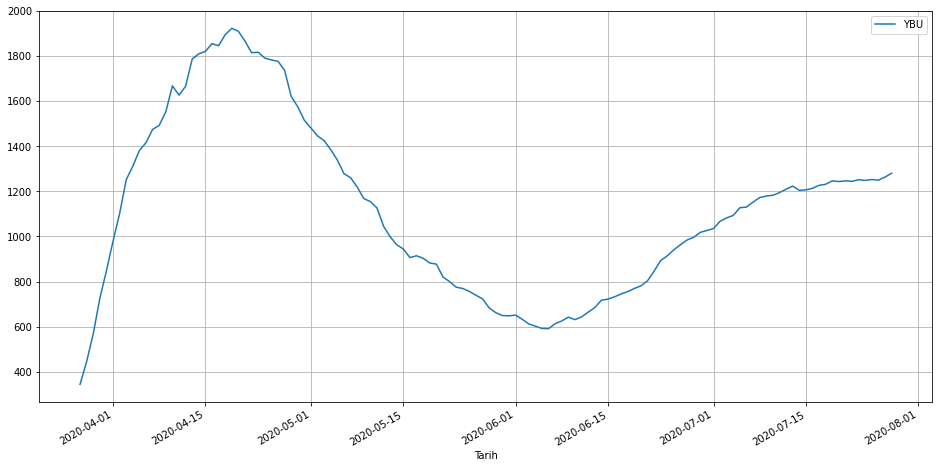

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['YBU'].plot()
plt.grid()
plt.legend(['YBU'])

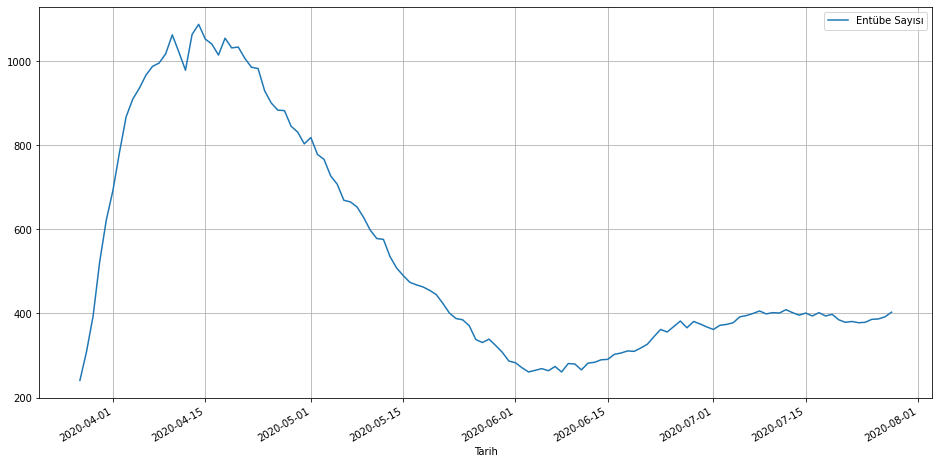

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['Entube'].plot()
plt.grid()
plt.legend(['Entübe Sayısı'])

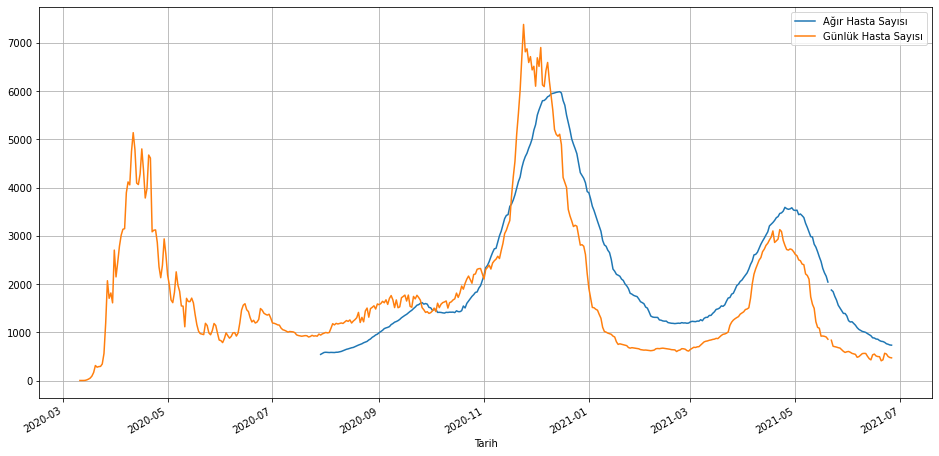

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['Ağır Hasta'].plot()
tarih_index['Gunluk_Hasta'].plot()
plt.grid()
plt.legend(['Ağır Hasta Sayısı','Günlük Hasta Sayısı'])

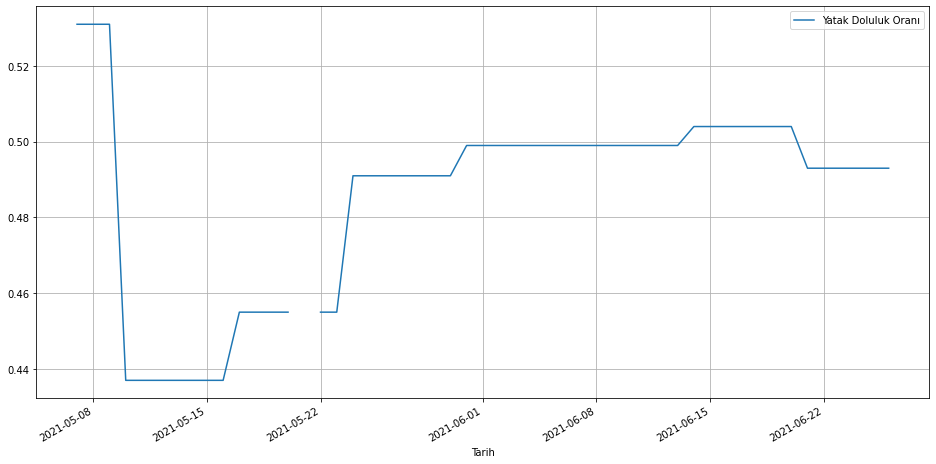

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['yatak_doluluk_orani'].plot()
plt.grid()
plt.legend(['Yatak Doluluk Oranı'])

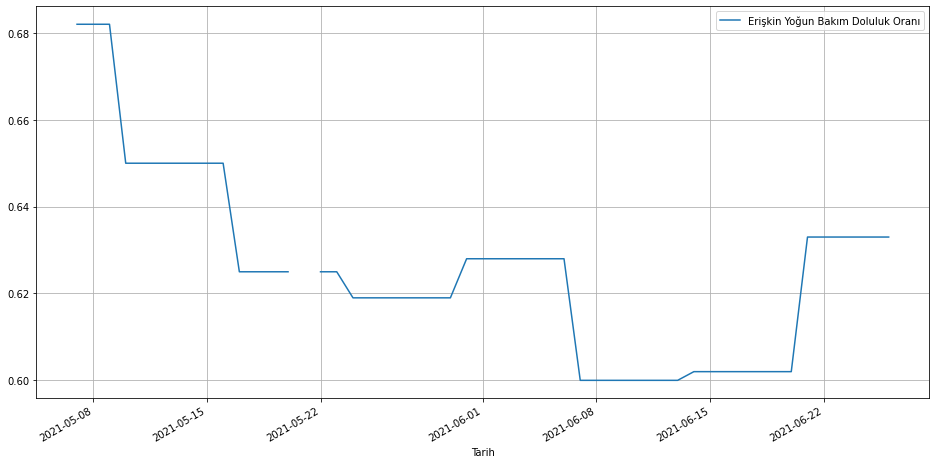

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['eriskin_yogun_bakim_doluluk_orani'].plot()
plt.grid()
plt.legend(['Erişkin Yoğun Bakım Doluluk Oranı'])

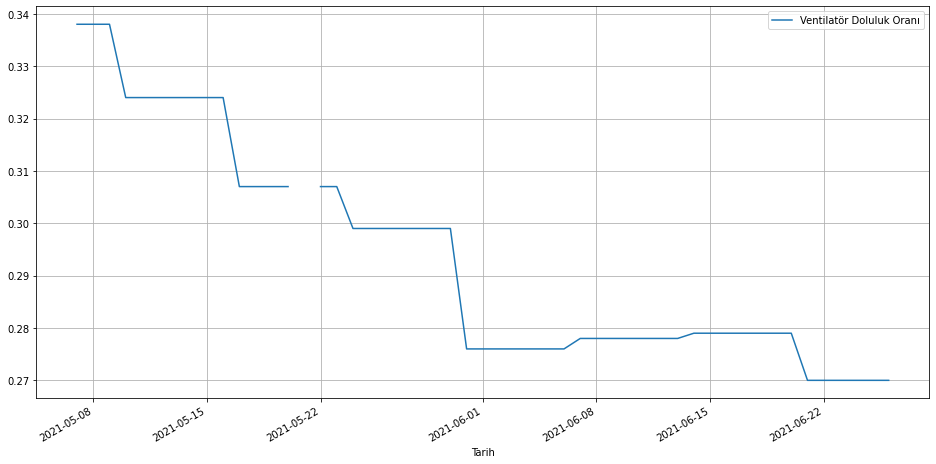

In [ ]:
plt.figure(figsize=(16,8))
tarih_index['ventilator_doluluk_orani'].plot()
plt.grid()
plt.legend(['Ventilatör Doluluk Oranı'])

**<font color='black'>data1'deki verilerin histogram grafiklerini inceleyelim.</font>**

Text(0.5, 1.0, 'Ventilatör Doluluk Oranı')

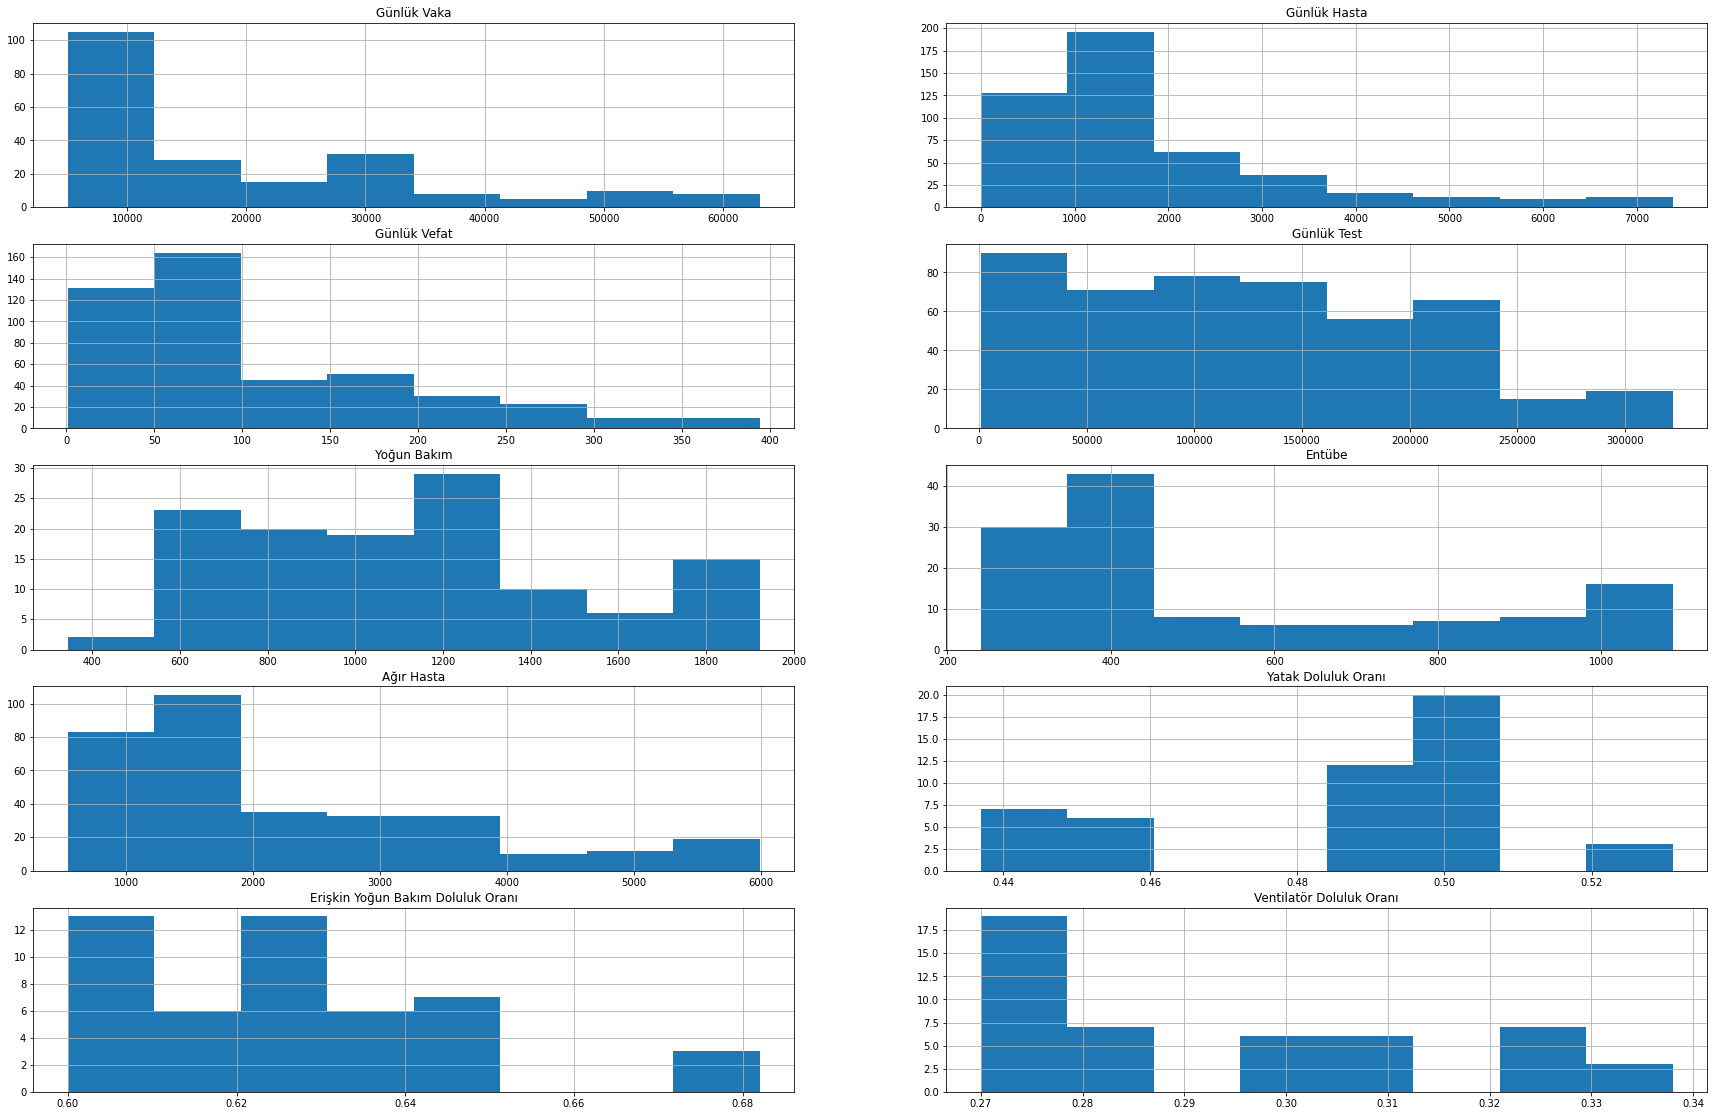

In [ ]:
plt.figure(figsize=(30,40))

plt.subplot(10,2,1)
plt.title("Günlük Vaka")
data1['Gunluk_Vaka'].hist(bins=8)

plt.subplot(10,2,2)
plt.title("Günlük Hasta")
data1['Gunluk_Hasta'].hist(bins=8)

plt.subplot(10,2,3)
plt.title("Günlük Vefat")
data1['Gunluk_Vefat'].hist(bins=8)

plt.subplot(10,2,4)
data1['Gunluk_Test'].hist(bins=8)
plt.title("Günlük Test")

plt.subplot(10,2,5)
data1['YBU'].hist(bins=8)
plt.title("Yoğun Bakım")

plt.subplot(10,2,6)
data1['Entube'].hist(bins=8)
plt.title("Entübe")

plt.subplot(10,2,7)
data1['Ağır Hasta'].hist(bins=8)
plt.title("Ağır Hasta")

plt.subplot(10,2,8)
data1['yatak_doluluk_orani'].hist(bins=8)
plt.title("Yatak Doluluk Oranı")

plt.subplot(10,2,9)
data1['eriskin_yogun_bakim_doluluk_orani'].hist(bins=8)
plt.title("Erişkin Yoğun Bakım Doluluk Oranı")

plt.subplot(10,2,10)
data1['ventilator_doluluk_orani'].hist(bins=8)
plt.title("Ventilatör Doluluk Oranı")

**<font color='black'>data1'deki verilerin korelasyonlarını inceleyelim.</font>**

In [ ]:
data1.corr()

,Toplam_Vaka,Gunluk_Vaka,Toplam_Hasta,Gunluk_Hasta,Toplam_Vefat,Gunluk_Vefat,Toplam_iyilesen,Gunluk_iyilesen,Toplam_Test,Gunluk_Test,YBU,Entube,Ağır Hasta,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani
Toplam_Vaka,1.000000,-0.056839,0.321189,-0.195273,0.988303,0.619206,0.997564,0.476100,0.978173,0.824398,-0.303920,-0.704777,0.000313,0.457740,-0.725390,-0.956199
Gunluk_Vaka,-0.056839,1.000000,0.435893,0.562513,-0.136363,0.652654,-0.147135,0.462998,-0.069242,0.727172,NaN,NaN,0.489219,-0.266616,0.808380,0.921103
Toplam_Hasta,0.321189,0.435893,1.000000,0.163524,0.349479,0.555476,0.263320,0.398926,0.398004,0.585765,-0.303920,-0.704777,0.374385,0.485147,-0.651788,-0.924692
Gunluk_Hasta,-0.195273,0.562513,0.163524,1.000000,-0.194462,0.435706,-0.268030,0.113613,-0.123149,0.184540,0.728361,0.911574,0.848972,-0.170038,0.838742,0.881040
Toplam_Vefat,0.988303,-0.136363,0.349479,-0.194462,1.000000,0.589873,0.989465,0.435090,0.995783,0.846328,-0.376593,-0.742697,-0.011289,0.466732,-0.765426,-0.969119
Gunluk_Vefat,0.619206,0.652654,0.555476,0.435706,0.589873,1.000000,0.576694,0.630888,0.612383,0.795320,0.814463,0.958312,0.722869,-0.517478,0.718869,0.956101
Toplam_iyilesen,0.997564,-0.147135,0.263320,-0.268030,0.989465,0.576694,1.000000,0.452072,0.976824,0.800563,-0.442514,-0.806596,-0.039053,0.384681,-0.786594,-0.958732
Gunluk_iyilesen,0.476100,0.462998,0.398926,0.113613,0.435090,0.630888,0.452072,1.000000,0.442461,0.552845,0.244828,0.157706,0.308946,-0.465122,0.728557,0.813657
Toplam_Test,0.978173,-0.069242,0.398004,-0.123149,0.995783,0.612383,0.976824,0.442461,1.000000,0.879748,-0.271087,-0.692593,0.031609,0.485821,-0.647495,-0.922666
Gunluk_Test,0.824398,0.727172,0.585765,0.184540,0.846328,0.795320,0.800563,0.552845,0.879748,1.000000,0.007853,-0.337382,0.449503,0.439477,-0.066142,-0.215437


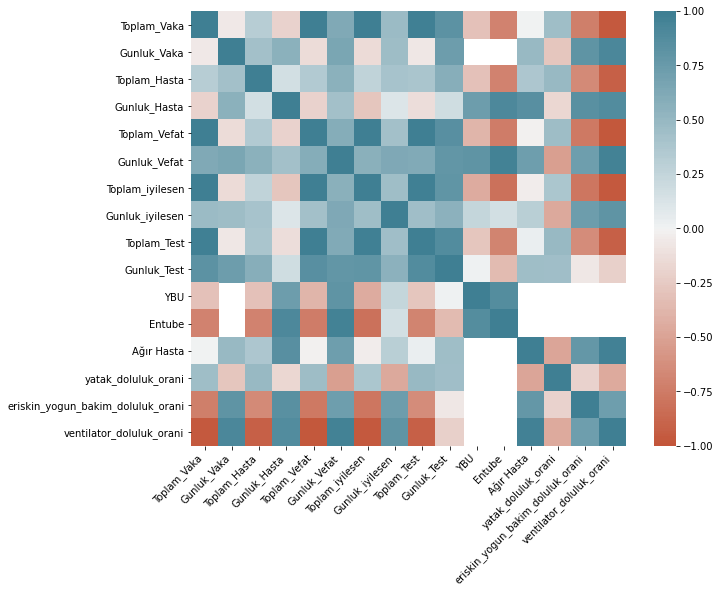

In [ ]:
corr = data1.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

# **<font color='black'>2.Kısım</font>**

**<font color='black'>Vaka sayılarının günlük veya toplam değişimini gözlemlemek için endeksimizi tarih olarak atayacağız.</font>**

In [ ]:
genc_t = genc.set_index('Tarih')
orta_t = orta.set_index('Tarih')
yasli_t = yasli.set_index('Tarih')

In [ ]:
kadın_t = kadın.set_index('Tarih')
erkek_t = erkek.set_index('Tarih')

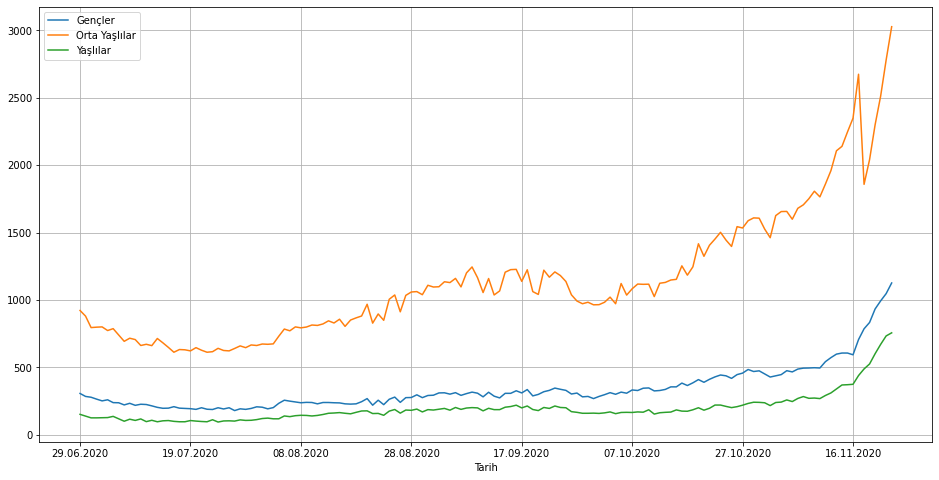

In [ ]:
plt.figure(figsize=(16,8))
genc_t[0].plot()
orta_t[0].plot()
yasli_t[0].plot()
plt.grid()
plt.legend(['Gençler','Orta Yaşlılar','Yaşlılar'])

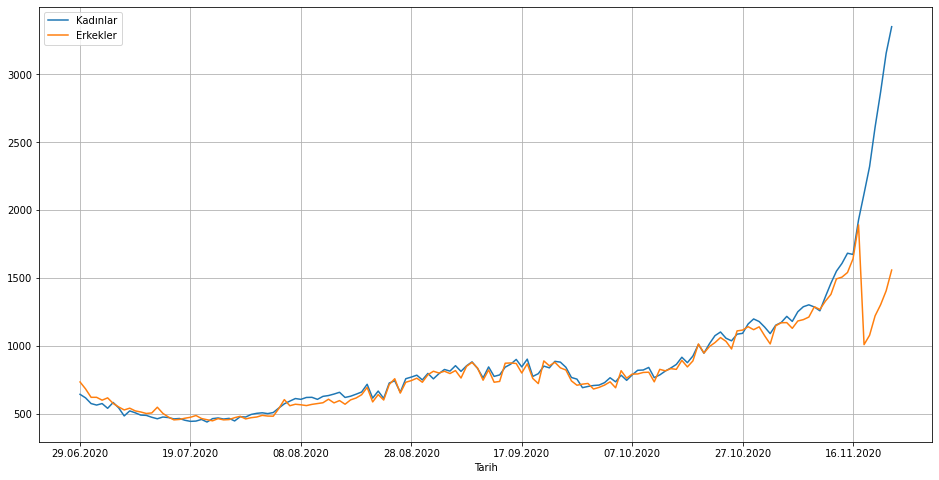

In [ ]:
plt.figure(figsize=(16,8))
kadın_t[0].plot()
erkek_t[0].plot()
plt.grid()
plt.legend(['Kadınlar','Erkekler'])